In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA,SparsePCA,IncrementalPCA,TruncatedSVD,FastICA,MiniBatchSparsePCA,FactorAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("Electrical Grid.csv")

data_x = data.drop(['stab','stabf'],axis=1)
data_y = data['stab']

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(data_x)
scaled_x = pd.DataFrame(scaled_x, columns=data_x.columns)

def Trees_Weighting_Random_Forest(training_x , training_y, test_x, max_depth, sample_size, n_trees, n_features):
    trees = []
    OOB_MSE = []
    Prediction_set = []
    for i in range(n_trees):
        train_x, valid_x ,train_y ,valid_y = train_test_split(training_x, training_y , train_size = sample_size) #隨機選擇n%的樣本

        DT = DecisionTreeRegressor(max_depth = max_depth , max_features=n_features )
        DT.fit(train_x,train_y)
        dt_pred = DT.predict(valid_x)

        OOB_MSE.append(  mean_squared_error(valid_y,dt_pred) ) #MSE
        oob_mse = OOB_MSE/np.sum(OOB_MSE)

        test_pred = DT.predict(test_x)
        Prediction_set.append(test_pred)

    final_results = []
    for i in range(len(Prediction_set[0])): #總共要預測的Y有幾個 #2000個預測值
        predict_result = [] #存放每棵樹的預測值 #100棵樹有100個預測值
        final_result = 0
        for j in range(len(Prediction_set)): #每棵樹的預測值 #100棵樹
            predict_result.append( (Prediction_set[j][i]) )

        for k in range(len(predict_result)): #加權預測值
            final_result =  final_result + predict_result[k] * oob_mse[k]
        final_results.append(final_result)
    return final_results

kf = KFold(n_splits=5, shuffle=True, random_state=42)

0.5
0.7
0.9
[0.012062970428745374, 0.012054257870976803, 0.012725559442365725]


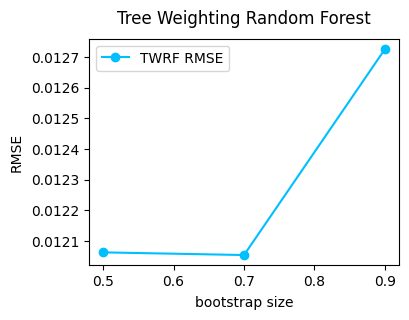

In [ ]:
bootstrap_sizes = [0.5,0.7,0.9]
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
import matplotlib.pyplot as plt

for bootstrap_size in bootstrap_sizes:
    print(bootstrap_size)
    RMSE_set_rf = []
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.

        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        TWRF = Trees_Weighting_Random_Forest(train_x , train_y, valid_x,max_depth=20,sample_size=bootstrap_size,n_trees=100, n_features = 12 )
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,TWRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set_rf))

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(bootstrap_sizes,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="TWRF RMSE")
plt.title("Tree Weighting Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("bootstrap size", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

10
20
30
40
50
[0.013112895312905659, 0.012075546744863901, 0.012122693173923732, 0.012068970684172023, 0.012053519016817553]


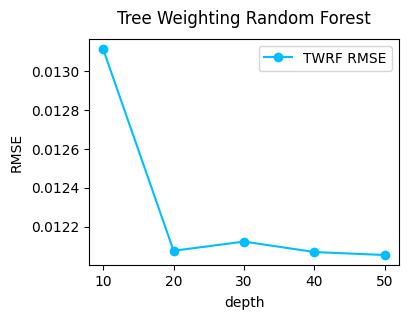

In [ ]:
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
import matplotlib.pyplot as plt
depths = [10,20,30,40,50]

for depth in depths:
    print(depth)
    RMSE_set_rf = []
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.

        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        TWRF = Trees_Weighting_Random_Forest(train_x,train_y,valid_x,max_depth=depth,sample_size=0.7,n_trees= 100,n_features=12)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,TWRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set_rf))

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(depths,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="TWRF RMSE")
plt.title("Tree Weighting Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("depth", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

300
500
700
900
[0.01199606134259204, 0.01198316964486398, 0.011951277079074101, 0.0119615921275893]


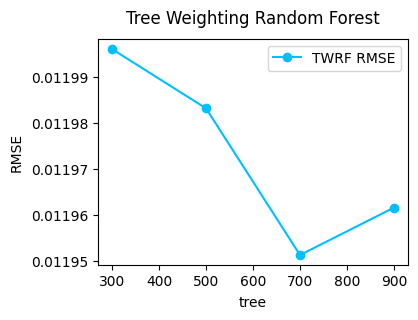

In [ ]:
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
import matplotlib.pyplot as plt
trees = [300,500,700,900]

for tree in trees:
    print(tree)
    RMSE_set_rf = []
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.

        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        TWRF = Trees_Weighting_Random_Forest(train_x,train_y,valid_x,max_depth =50,sample_size=0.7,n_trees=tree,n_features=12)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,TWRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set_rf))

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(trees,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="TWRF RMSE")
plt.title("Tree Weighting Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("tree", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

4
6
8
10
12
[0.012139888745299154, 0.01183296060315867, 0.011810145821833453, 0.011859054164944214, 0.01196657117730334]


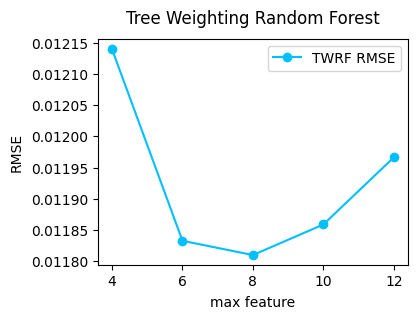

In [ ]:
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
import matplotlib.pyplot as plt
features = [4,6,8,10,12]

for feature in features:
    print(feature)
    RMSE_set_rf = []
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.

        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        TWRF = Trees_Weighting_Random_Forest(train_x,train_y,valid_x,max_depth=50,sample_size =0.7,n_trees=700,n_features=feature)
        RMSE_set_rf.append( np.sqrt( mean_squared_error(valid_y,TWRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set_rf))

print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(features,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="TWRF RMSE")
plt.title("Tree Weighting Random Forest", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("max feature", fontsize=10, labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1
RMSE_set_srf ,RMSE_set_twrf= [],[]
for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
    print('fold',cnt)
    train_x = scaled_x.iloc[train_index,:]
    train_y = data.iloc[train_index,:]['stab']
    valid_x = scaled_x.iloc[valid_index,:]
    valid_y = data.iloc[valid_index,:]['stab']
    twrf_pred = Trees_Weighting_Random_Forest( training_x = train_x , training_y = train_y ,test_x= valid_x, n_trees = 700, max_depth= 50, sample_size = 0.7 , n_features = 8)
    RMSE_set_twrf.append( np.sqrt( mean_squared_error(valid_y,twrf_pred)))
    cnt+=1

print("twrf",RMSE_set_twrf)
print("mean",np.mean(RMSE_set_twrf))

fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
twrf [0.012030583931753689, 0.011811486206172542, 0.011823533998802673, 0.011332931319561887, 0.011230322371812703, 0.011623279847834875, 0.011069368588209637, 0.011372957467255407, 0.011315184455639914, 0.012553682594466287]
mean 0.011616333078150961
